In [205]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [206]:
#! pip install pandas_datareader

In [207]:
pg = wb.DataReader("PG",data_source="yahoo",start="1995-1-1")

In [208]:
pg["simple return"] = (pg["Adj Close"]/pg["Adj Close"].shift(1))-1
print(pg["simple return"].head())

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
Name: simple return, dtype: float64


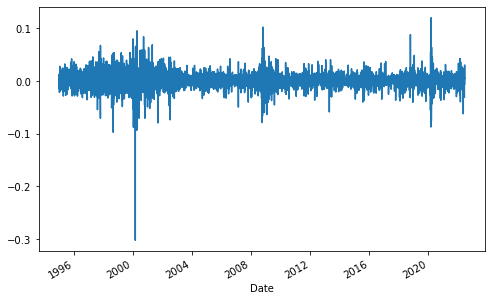

In [209]:
pg["simple return"].plot(figsize=(8,5))
plt.show()

In [210]:
avg_returns = pg["simple return"].mean()
avg_returns

0.0005125174430590586

In [211]:
avg_returns_a = pg["simple return"].mean()*250
avg_returns_a

0.12812936076476467

In [212]:
print(str(round(avg_returns_a,5)*100)+"%")

12.812999999999999%


In [213]:
exp1 = pg["Close"].ewm(span=12,adjust=False).mean()
exp2 = pg["Close"].ewm(span=26,adjust=False).mean()
pg["MACD"] = exp1-exp2
pg["signal"]=pg["MACD"].ewm(span=9,adjust=False).mean()

In [214]:
pg.tail();

<AxesSubplot:>

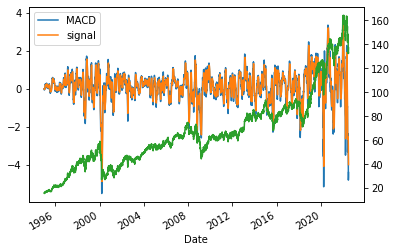

In [215]:
fig ,ax =plt.subplots()
pg[["MACD","signal"]].plot(ax=ax)
pg["Close"].plot(ax=ax,alpha=1,secondary_y=True)

stochastic oscillator

In [216]:
high14 = pg["High"].rolling(14).max()
low14 =  pg["Low"].rolling(14).min()
pg["%k"] = (pg["Close"]-low14)*100/(high14-low14)
pg["%d"] = pg["%k"].rolling(3).mean()

<AxesSubplot:>

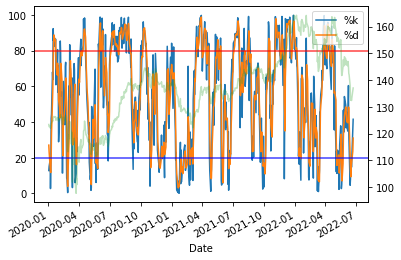

In [217]:
fig ,ax = plt.subplots()
pg[["%k","%d"]].loc["2020-01-01":].plot(ax=ax)
ax.axhline(80,c="r",alpha=.75)
ax.axhline(20,c="b",alpha=.75)
pg["Close"].loc["2020-01-01":].plot(ax=ax,alpha=0.3,secondary_y=True)

Log Returns

In [218]:
pg["Log returns"] = np.log(pg["Adj Close"]/pg["Adj Close"].shift(1))


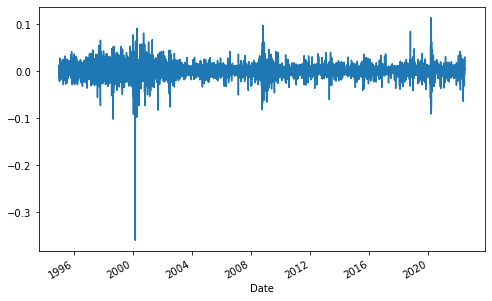

In [219]:
pg["Log returns"].plot(figsize=(8,5))
plt.show()

Portfolio

In [220]:
ticker = ["PG","MSFT","F","GE"]
mydata = pd.DataFrame()
for t in ticker:
    mydata[t] = wb.DataReader(t,data_source="yahoo",start="1995-1-1")["Adj Close"]

<AxesSubplot:xlabel='Date'>

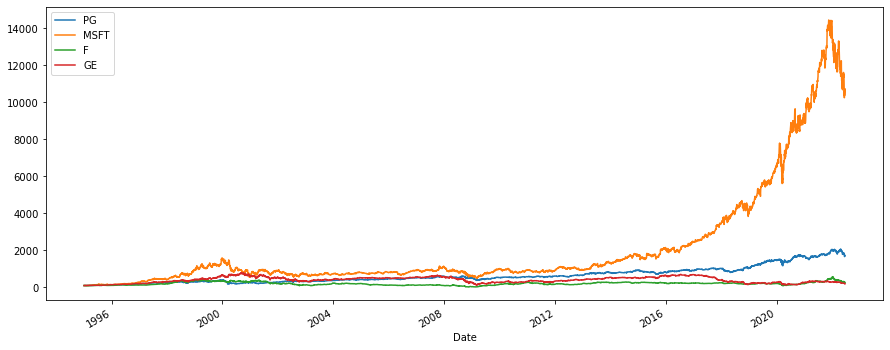

In [221]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))

In [222]:
returns = (mydata/mydata.shift(1))-1
returns;

In [223]:
weights = np.array([0.25,0.25,0.25,0.25])

In [224]:
np.dot(returns,weights)

array([        nan,  0.00653987, -0.00922968, ...,  0.00320901,
        0.01789509, -0.00897431])

In [225]:
anual_returns = returns.mean()*250
anual_returns

PG      0.128129
MSFT    0.217854
F       0.115705
GE      0.076079
dtype: float64

In [226]:
np.dot(anual_returns,weights)

0.1344416571661246

In [227]:
#!pip install yfinance

In [228]:
import yfinance as yf
from datetime import datetime

In [229]:
start =datetime(2010,1,1)
end = datetime.now().isoformat()
start

datetime.datetime(2010, 1, 1, 0, 0)

In [230]:
a=1
a

1

In [231]:
tickers = ["PG","^GSPC","^DJI"]
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = wb.DataReader(t,data_source="yahoo",start="2000-1-1")["Adj Close"]

<AxesSubplot:xlabel='Date'>

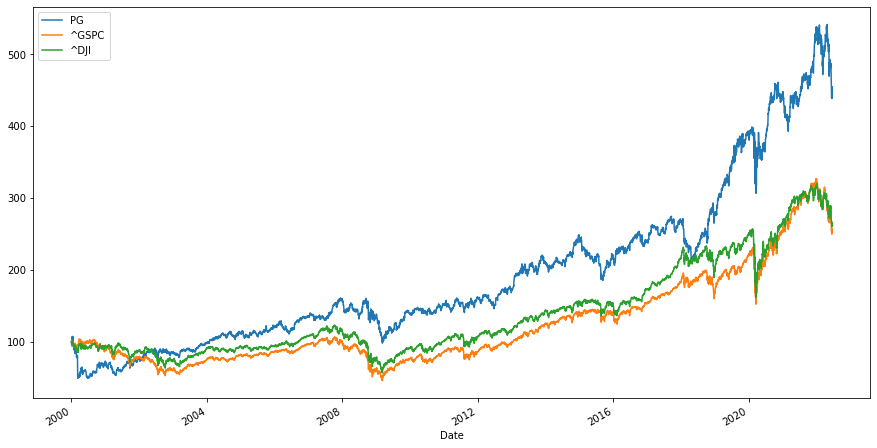

In [232]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,8))

find Covariance and Corelation

In [233]:
tickers = ["PG","BEI.DE"]
stock_1 = pd.DataFrame()
for t in tickers:
    stock_1[t]=wb.DataReader(t,data_source="yahoo",start="2000-1-1")["Adj Close"]

In [234]:
pg_var = stock_1["PG"].var()
"$" + str(pg_var)

'$1151.5941967592144'

In [235]:
bei_var = stock_1["BEI.DE"].var()
"$" + str(bei_var)

'$773.9343813489622'

In [236]:
cov_matrix = stock_1.cov()
cov_matrix

,PG,BEI.DE
PG,1151.594197,842.003681
BEI.DE,842.003681,773.934381


In [237]:
corr_matrix = stock_1.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.891919
BEI.DE,0.891919,1.000000


<AxesSubplot:xlabel='Date'>

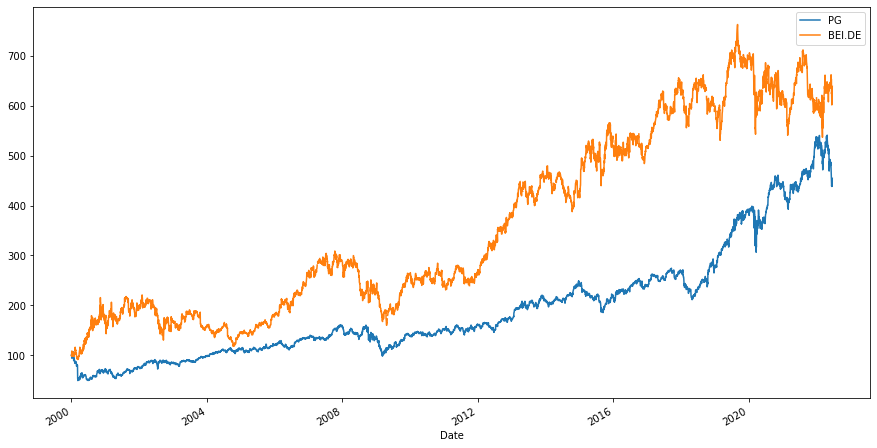

In [238]:
(stock_1/stock_1.iloc[0]*100).plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

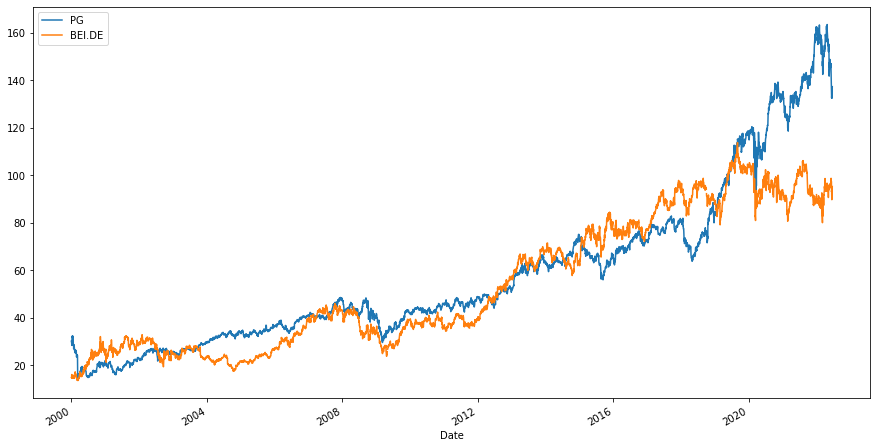

In [239]:
stock_1.plot(figsize=(15,8))

In [240]:
stocks_2 = ["PG","^GSPC"]
pf_data = pd.DataFrame()

for t in stocks_2:
            pf_data[t] = wb.DataReader(t,data_source="yahoo",start="2010-1-1")["Adj Close"]

In [241]:
pf_data.head();

<AxesSubplot:xlabel='Date'>

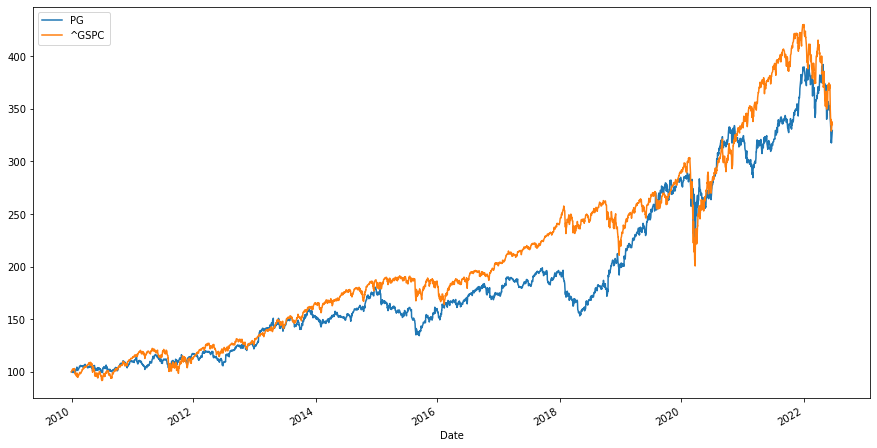

In [242]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(15,8))

In [243]:
log_return = np.log(pf_data/pf_data.shift(1))
log_return.mean()*250 , log_return.cov() , log_return.corr()

(PG       0.094940
 ^GSPC    0.096311
 dtype: float64,
              PG     ^GSPC
 PG     0.000118  0.000069
 ^GSPC  0.000069  0.000123,
              PG     ^GSPC
 PG     1.000000  0.574834
 ^GSPC  0.574834  1.000000)

In [244]:
num_assets = len(stocks_2)

In [245]:
num_assets

2

In [246]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.87965536, 0.12034464])

In [247]:
weights[0]+weights[1]

1.0

Expected Portfolio Returns

In [248]:
np.sum(weights*log_return.mean())*250

0.09510545279784302

Expected Portfolio Variance

In [249]:
np.dot(weights.T,np.dot(log_return.cov()*250,weights))

0.026956884111119215

Expected Portfolio Volatility

In [250]:
np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights)))

0.16418551736106085

In [251]:
portfolio_returns = []
portfolio_volatility = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_return.mean())*250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights))))

portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)


In [252]:
portfolios = pd.DataFrame({"returns":portfolio_returns,"volatility":portfolio_volatility})

In [253]:
portfolios.head();

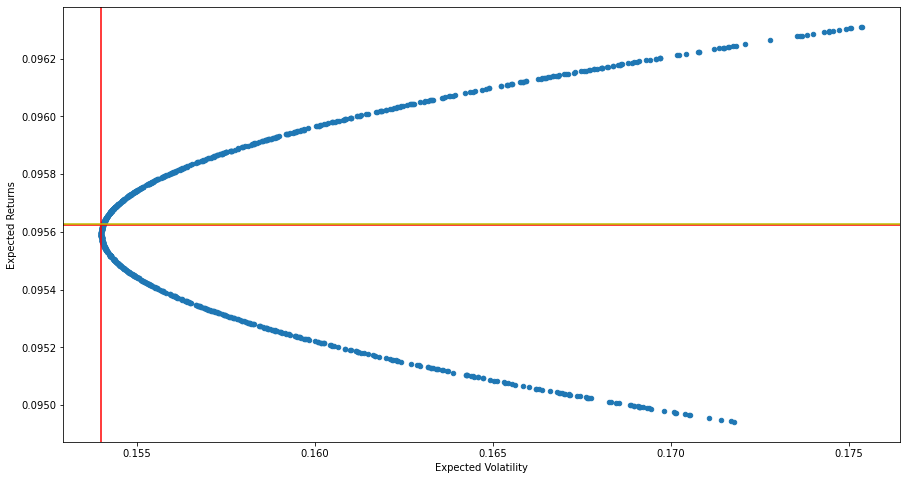

In [254]:
portfolios.plot(x="volatility",y="returns",kind="scatter",figsize=(15,8))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Returns")
plt.axvline(portfolios["volatility"].min(),c="r")
plt.axhline(portfolios["returns"].median(),c="r")
plt.axhline(portfolios["returns"].mean(),c="y")

#plt.axvline(x=.165, ymin=0.25, ymax=0.75,c="b")

Beta Calculation 

In [255]:
sec_returns = np.log(pf_data/pf_data.shift(1))

In [256]:
sec_returns.head()

,PG,^GSPC
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.008049,0.015916
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993


In [257]:
cov = sec_returns.cov()*250
cov

,PG,^GSPC
PG,0.029522,0.017323
^GSPC,0.017323,0.030764


In [258]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.017323277087118154

In [259]:
market_var = sec_returns["^GSPC"].var()*250
market_var

0.03076354907473743

In [260]:
pg_beta = cov_with_market/market_var
pg_beta

0.5631104865382315

P&G is defencive stock 
if B is > 1 : Defencive stock,
if B is < 1 : ,
if B is = 0 : no maket relations

calculating the Expected Returns of P&G( CAPM )

In [262]:
pg_er = 0.025 + pg_beta*0.05
pg_er

0.05315552432691158

Sharp Ratio: $ (Rpg - Rf)/sig(pg) $

In [268]:
sharp = (pg_er - 0.025)/(sec_returns["PG"].std()*250**0.5)
sharp

0.16386792613050544